# Analyzing ecommerce business performance with SQL

## Overview

As data analyst at one of largest ecommerce company in South America, get a responsibility to analyze three aspects that relate to business performance. Those three aspects are annual customer growth, product category quality and payment method. 

This ecommerce company already provided the dataset to the data analytics team. There are eight dataset that need to be ingested to database such as customers, geolocations, sellers, order items, orders, reviews, products and payments. The following figure below describes the relation between each dataset.

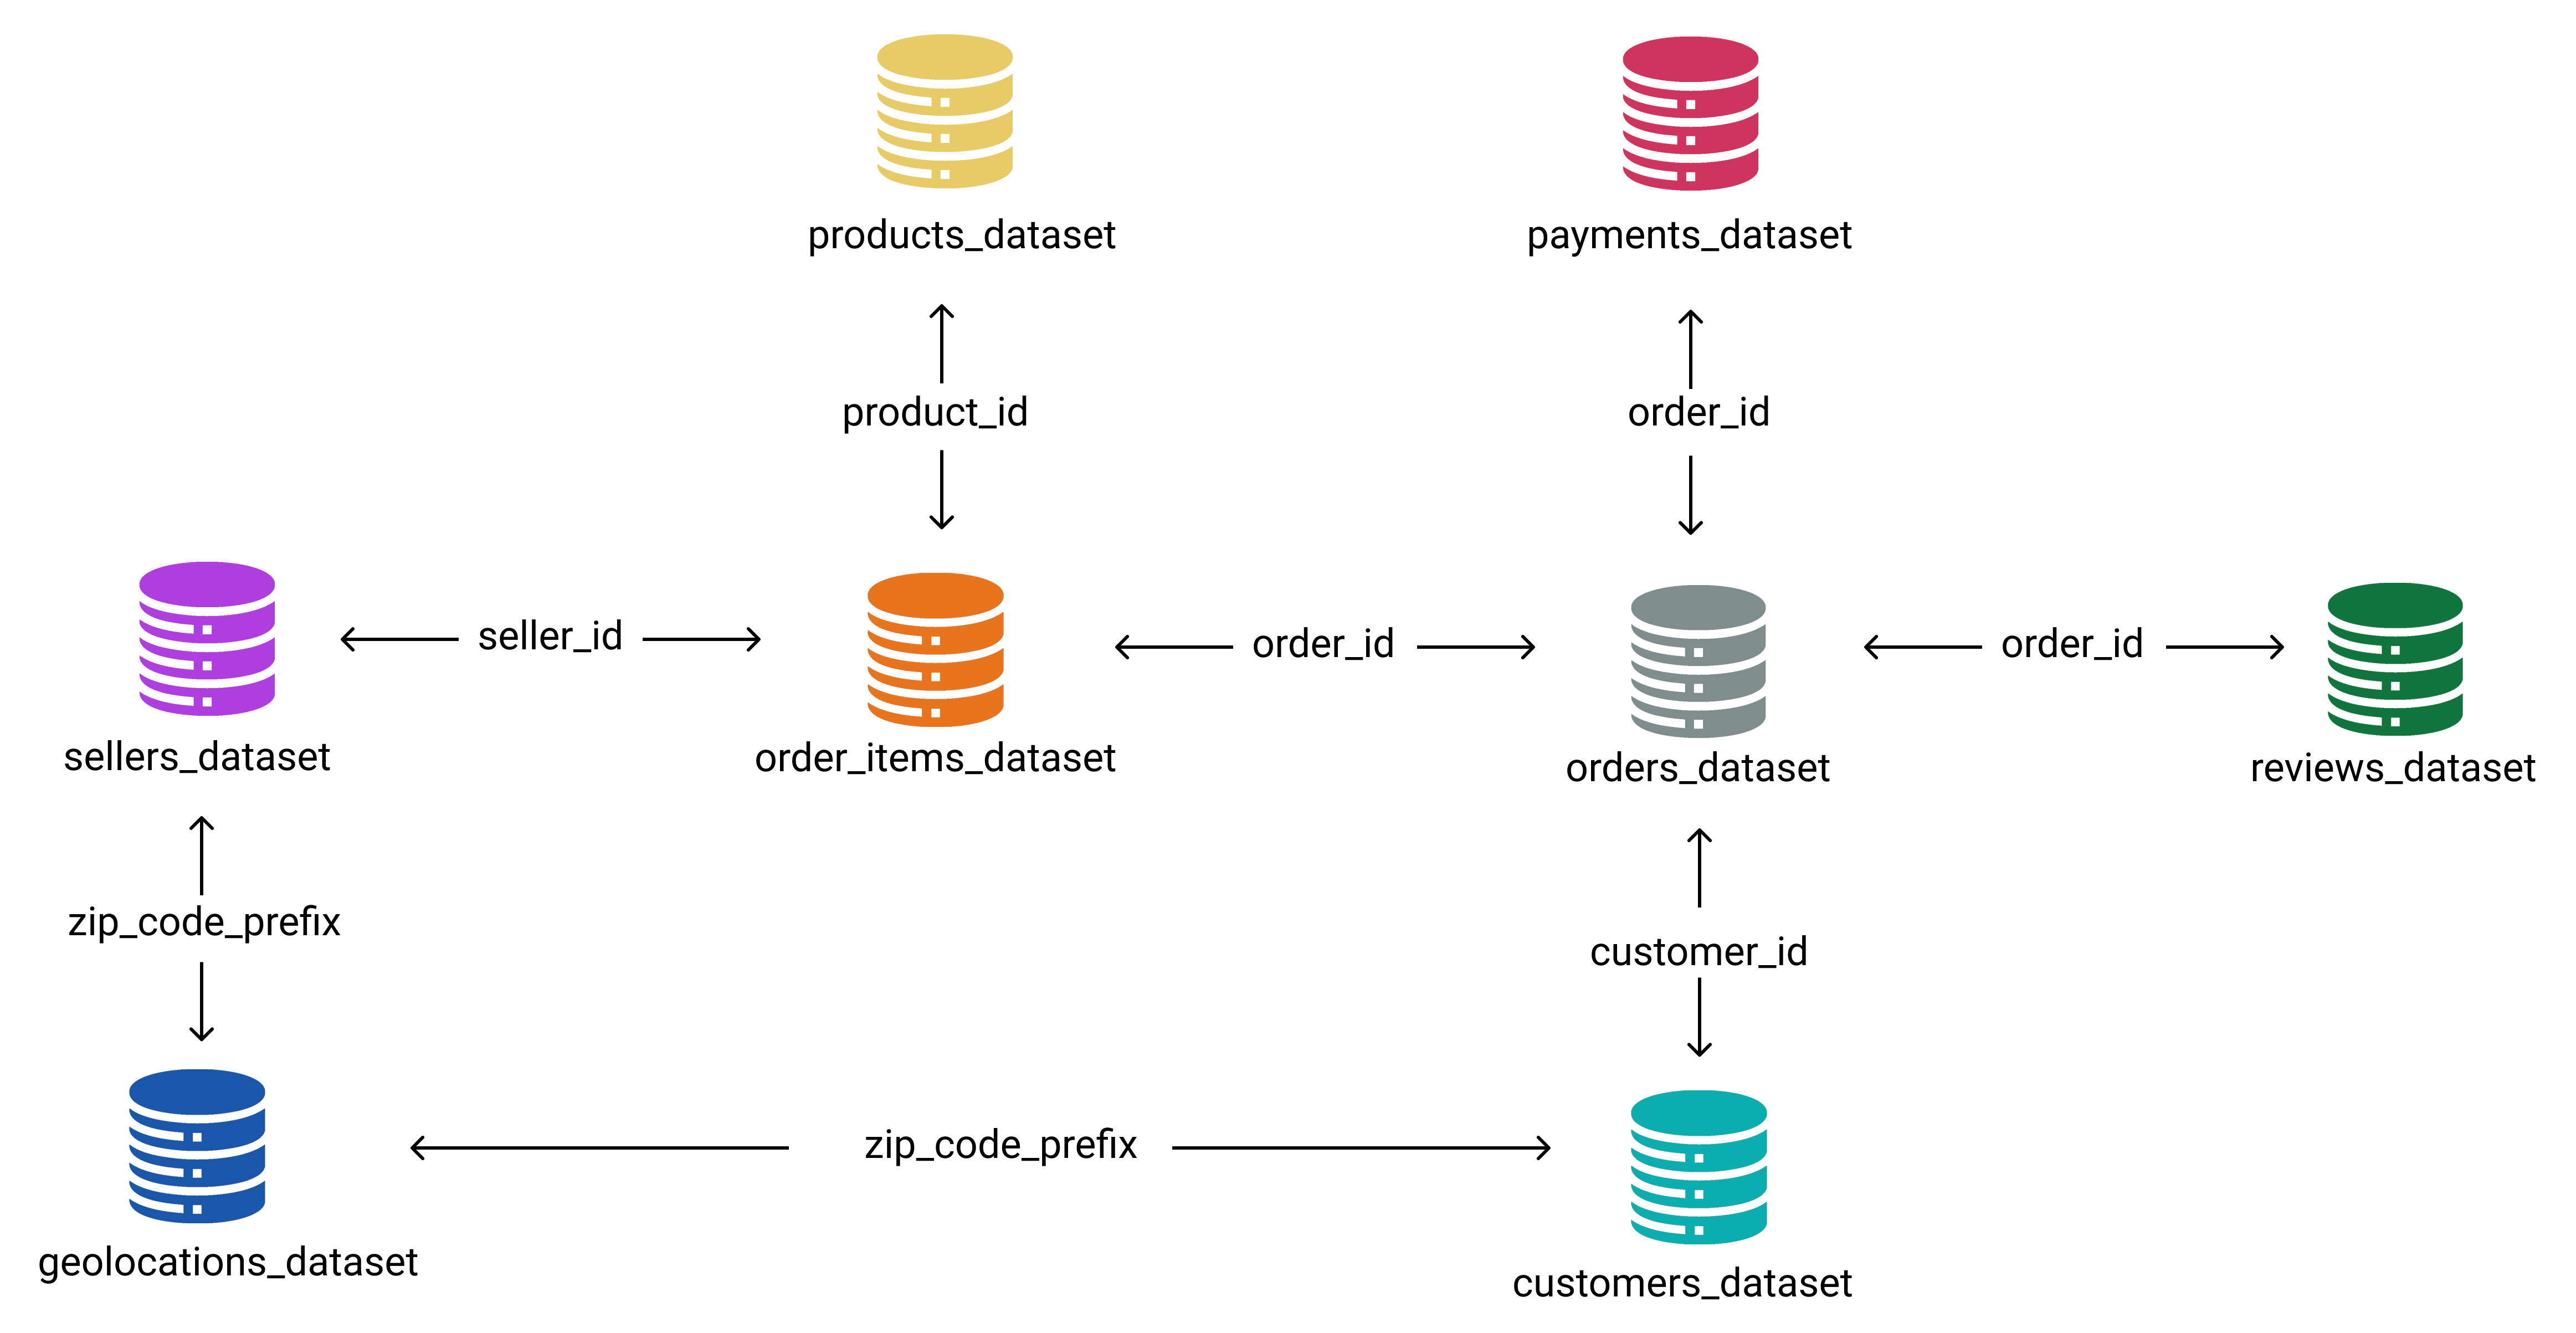

Since there is no explicit information about Primary Key and Foreign Key for each table, we will investigate each table to correctly assign Primary Key and Foreign Key.

## Dependencies and Query Engine

In [1]:
import database_credentials as dc
import pandas as pd
from sqlalchemy import create_engine

# Create a connection to postgres database
# Notes that all credentials are hidden to protect sensitive information being leaked
db_connection = create_engine(f"{dc.dialect}://{dc.username}:{dc.password}@{dc.hostname}:{dc.port}/{dc.db_name}")

# Test the connection
db_connection.connect()

## Investigate all ecommerce dataset

In [4]:
# Check all dataset filename
!ls ./dataset

customers_dataset.csv
geolocation_dataset.csv
order_items_dataset.csv
order_payments_dataset.csv
order_reviews_dataset.csv
orders_dataset.csv
product_dataset.csv
sellers_dataset.csv


### Customers

In [9]:
def read_dataframe(dataset_name):
    return pd.read_csv(f"./dataset/{dataset_name}.csv")

def unique_values(df):
    for name in list(df.columns):
        print(f"{name}: {df[name].nunique()} unique values") 

In [11]:
df_customers = read_dataframe("customers_dataset")
df_customers.sample(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5735,a3daf46a16efe357bd0805ae760246cc,838f7d52022dc0a6b56432af33155111,32450,sarzedo,MG
87635,751a05b324683e65537d345c3933a9de,d698d987204fa8409f973d39a5b8f075,15425,embauba,SP


In [5]:
df_customers.shape

(99441, 5)

In [10]:
unique_values(df_customers)

customer_id: 99441 unique values
customer_unique_id: 96096 unique values
customer_zip_code_prefix: 14994 unique values
customer_city: 4119 unique values
customer_state: 27 unique values


Total unique values of customer_id are 99441 which is same as total observations in customers dataset. It means customer_id can be used as primary key.



### Geolocation

In [12]:
df_geolocation = read_dataframe("geolocation_dataset")
df_geolocation.sample(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
47026,3186,-23.562358,-46.582062,sao paulo,SP
34886,2618,-23.469379,-46.649749,sao paulo,SP


In [13]:
df_geolocation.shape

(1000163, 5)

In [14]:
unique_values(df_geolocation)

geolocation_zip_code_prefix: 19015 unique values
geolocation_lat: 717360 unique values
geolocation_lng: 717613 unique values
geolocation_city: 8011 unique values
geolocation_state: 27 unique values


### Order Items

In [16]:
df_order_items = read_dataframe("order_items_dataset")
df_order_items.sample(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
39163,58fbd882a7ce0cf6eca11251a96931d1,1,66a0a6e02b7f543e5b021ce361f267d4,7a67c85e85bb2ce8582c35f2203ad736,2017-09-27 03:04:37,119.99,17.09
110792,fbb4b099937e8d62bcf20d31634fa166,1,c3674fb8631d709e138f75fad3bf1b01,bccf933e006e9b94a6184af782963e77,2018-08-10 16:55:30,24.90,23.32


In [17]:
df_order_items.shape

(112650, 7)

In [18]:
unique_values(df_order_items)

order_id: 98666 unique values
order_item_id: 21 unique values
product_id: 32951 unique values
seller_id: 3095 unique values
shipping_limit_date: 93318 unique values
price: 5968 unique values
freight_value: 6999 unique values


No columns that have unique values match with total number of dataset rows. Refer to table relationship, these columns such as order_id, product_id, seller_id are foreign key.

### Sellers

In [19]:
df_sellers = read_dataframe("sellers_dataset")
df_sellers.sample(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
580,f76a3b1349b6df1ee875d1f3fa4340f0,3275,sao paulo,SP
2097,20611af7866c6068fd5ae1f9dbe15c92,13660,porto ferreira,SP


In [20]:
df_sellers.shape

(3095, 4)

In [21]:
unique_values(df_sellers)

seller_id: 3095 unique values
seller_zip_code_prefix: 2246 unique values
seller_city: 611 unique values
seller_state: 23 unique values


seller_id is primary key of this sellers table.

## Upload all dataset to the database

Before uploading data to database, there are several things to do such as

If you use SQL approach to upload the dataset, you need to configure file permissions in order to have an access to read and write. 

```
Go to file directory -> right-click on a dataset folder -> click 'security' tab -> click 'Edit' -> Write 'Everyone' then check 'Full Control' 
```

For writing the file path on query syntax in this JupyterLab notebook, please write with this format below.

```
FROM 'C:/dataset/dataset_name.csv'
```

In [ ]:
query = """
-- assign schema and search path
CREATE SCHEMA ecommerce;
SET search_path = ecommerce;

-- customer table
CREATE TABLE customers (
    "customer_id" VARCHAR PRIMARY KEY,
    "customer_unique_id" VARCHAR,
    "customer_zip_code_prefix" VARCHAR,
    "customer_city" VARCHAR,
    "customer_state" VARCHAR
);
COPY customers(
    "customer_id",
    "customer_unique_id",
    "customer_zip_code_prefix",
    "customer_city",
    "customer_state"
)
FROM 'C:/Users/Abrisyaf/Portofolio/business-performance-analysis/dataset/customers_dataset.csv'
DELIMITER ','
CSV HEADER; 

-- geolocation table
CREATE TABLE geolocation (
    "geolocation_zip_code_prefix" VARCHAR,
    "geolocation_lat" NUMERIC,
    "geolocation_lng" NUMERIC,
    "geolocation_city" VARCHAR,
    "geolocation_state" VARCHAR
);
COPY geolocation (
    "geolocation_zip_code_prefix",
    "geolocation_lat",
    "geolocation_lng",
    "geolocation_city",
    "geolocation_state"
)
FROM 'C:/Users/Abrisyaf/Portofolio/business-performance-analysis/dataset/geolocation_dataset.csv'
DELIMITER ','
CSV HEADER;

-- sellers table
CREATE TABLE sellers (
    "seller_id" VARCHAR PRIMARY KEY,
    "seller_zip_code_prefix" VARCHAR,
    "seller_city" VARCHAR,
    "seller_state" VARCHAR
);
COPY sellers (
    "seller_id",
    "seller_zip_code_prefix",
    "seller_city",
    "seller_state"
)
FROM 'C:/Users/Abrisyaf/Portofolio/business-performance-analysis/dataset/sellers_dataset.csv'
DELIMITER ','
CSV HEADER;

"""
#db_connection.execute(query)

In [26]:
!head -n 2 ./dataset/sellers_dataset.csv

"seller_id","seller_zip_code_prefix","seller_city","seller_state"
"3442f8959a84dea7ee197c632cb2df15","13023",campinas,SP
